# Recognizing a Digit
In this example, we try to recognise digits of class 9 given training
examples from classes 0-8.

In [1]:
import os
from IPython.display import Image
import numpy as np
from pathlib import Path
from sklearn import metrics

cwd = os.getcwd()
os.chdir(Path(cwd).parents[1])

from lsanomaly import LSAnomaly
import lsanomaly.notebooks.digits as demo

digits = os.path.join(os.getcwd(), "lsanomaly", "notebooks", "digits.png")

The $8\times 8$ images of digits are loaded from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Any digit $< 9$
is defined as the _inlier_ class. Thus, the digit 9 is an _outlier_ or _anomaly_. Note
this is similar to the [SVC example](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py).

## Anomaly Model

In [2]:
X_train, X_test, y_train, y_test = demo.data_prep(test_size=0.5)

anomaly_model = LSAnomaly()
anomaly_model.fit(X_train, y_train)

LSAnomaly(gamma=0.0021276595744680847,
          kernel_pos=array([[ 0.,  0.,  1., ..., 14.,  2.,  0.],
       [ 0.,  0.,  2., ..., 12., 13.,  8.],
       [ 0.,  0.,  3., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  3., ...,  0.,  0.,  0.],
       [ 0.,  0.,  7., ...,  2.,  0.,  0.],
       [ 0.,  0.,  5., ..., 16., 16., 16.]]),
          n_kernels_max=500, rho=0.1, seed=None, sigma=21.6794833886788)

In [3]:
predictions = anomaly_model.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test == 9, predictions[:, -1])

### ROC Curve

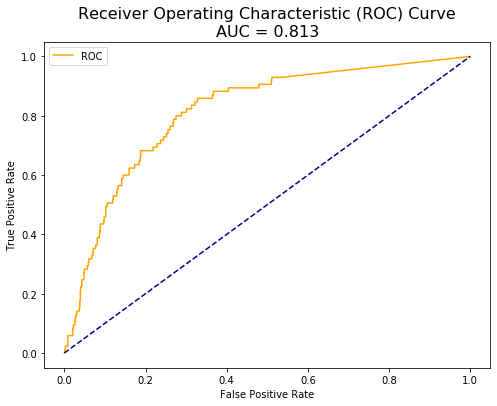

In [4]:
demo.plot_roc(fpr, tpr, metrics.auc(fpr, tpr))

### Confusion Matrix

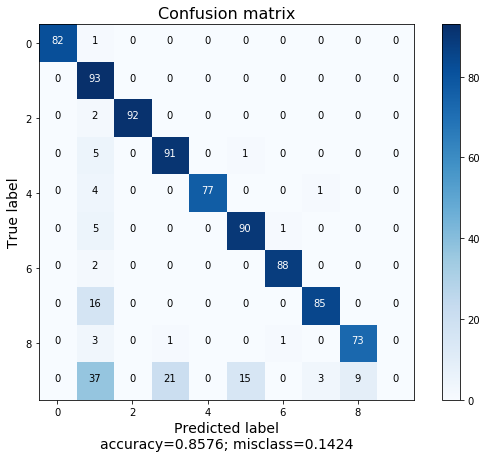

In [5]:
y_pred = anomaly_model.predict(X_test)

y_pred = [w if np.isreal(w) else 9 for w in y_pred]
demo.plot_confusion_matrix(y_test,
                           y_pred,
                           title='Confusion matrix',
                           normalize=False)